# Conduct an investigation on a web application to identify malicious attack activity using Python data science libraries.


### Task: Conduct an investigation on a web application to identify malicious attack activity using Python data science libraries.
---

As a cyber security analyst, you have been provided with a set of logs related to your organisation web server. You will need to analyse these logs and seek out suspicious activity based on the data available.

More information about Microsoft Internet Information Services (IIS) can be found at the following URL:
https://docs.microsoft.com/en-us/previous-versions/iis/6.0-sdk/ms525410(v=vs.90)

---

## Importing the libraries

In [1]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

## Importing the dataset

My UWE User ID is **s5-ahsan** and the given dataset has been linked as below

In [2]:
data_file = 's5-ahsan'

In [3]:
# Load in the data set as required - 
data_path = './'
data = pd.read_csv(data_path + data_file, delim_whitespace=True)
#data.to_csv('out.csv')
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
data

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,02:22:00,194.77.81.230,GET,jdctmnpf.css,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,21
1,2022-01-01,02:22:00,194.77.81.230,GET,index.aspx,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,27
2,2022-01-01,02:22:08,194.77.81.230,GET,favico.ico,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,22
3,2022-01-01,02:22:08,194.77.81.230,GET,index.aspx,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,25
4,2022-01-01,02:22:12,194.77.81.230,GET,template.css,v=qoxbvkqa,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70870,2022-01-30,23:26:20,194.77.81.230,GET,transactions.aspx,page=4,443,xk388761,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/transactions.aspx,200,0,0,27
70871,2022-01-30,23:26:46,194.77.81.230,GET,mwwduqjt.css,-,443,xk388761,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/transactions.aspx,200,0,0,24
70872,2022-01-30,23:26:46,194.77.81.230,GET,ufaldnnx.css,-,443,xk388761,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/transactions.aspx,404,0,0,29
70873,2022-01-30,23:26:46,194.77.81.230,GET,template.css,v=ecdjzkma,443,xk388761,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/transactions.aspx,200,0,0,27


In [4]:
data.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,02:22:00,194.77.81.230,GET,jdctmnpf.css,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,21
1,2022-01-01,02:22:00,194.77.81.230,GET,index.aspx,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,27
2,2022-01-01,02:22:08,194.77.81.230,GET,favico.ico,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,22
3,2022-01-01,02:22:08,194.77.81.230,GET,index.aspx,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,25
4,2022-01-01,02:22:12,194.77.81.230,GET,template.css,v=qoxbvkqa,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,30


In [5]:
# Get all column names
index=data.columns

In [6]:
index

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [7]:
# Get count of each unique value for 'cs(Referer)'
data['cs(Referer)'].value_counts()

https://bankofpunk.local/transactions.aspx         23821
https://bankofpunk.local/index.aspx                18004
https://bankofpunk.local/login.aspx                13583
https://bankofpunk.local/account_status.aspx        6266
-                                                   6045
https://bankofpunk.local/transfer.aspx              1784
https://bankofpunk.local/changepassword.aspx         580
https://bankofpunk.local/faq.aspx                    385
https://bankofpunk.local/transfer_complete.aspx      289
https://bankofpunk.local/change_avatar.aspx          118
Name: cs(Referer), dtype: int64

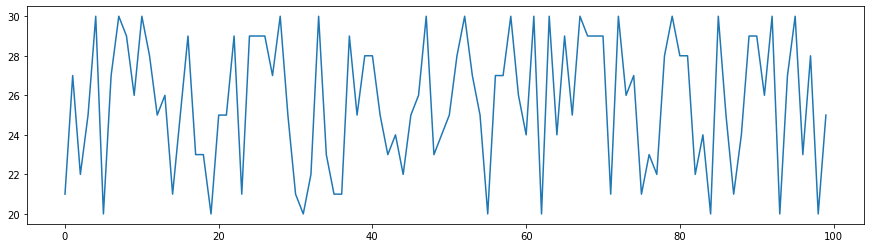

In [8]:
# Plot the first 100 values for the 'time-taken' column
plt.figure(figsize=(15,4))
plt.plot(data['time-taken'][:100])
plt.show()

# Start the investigation...

Carry on with the investigation based on the initial code provided above. Conclude you investigation with a summary of what activities you have identified and why they are deemed to be suspicious.

**STEP 1**: Find which client ip addresses are top in the table from the given dataset. The below table shows ip address **92.42.141.20** is hight. 

In [9]:
# c-ip column value count 
data['c-ip'].value_counts()

92.42.141.20       320
213.172.38.186     195
200.108.172.247    152
80.169.60.109      145
130.176.254.108    143
                  ... 
45.150.243.201      22
91.193.11.217       21
185.202.141.17      21
193.150.182.93      20
194.107.251.82      19
Name: c-ip, Length: 987, dtype: int64

**STEP 2**: Find value count for sc-status (status of the action, represented by a success or error code) code. 

In [10]:
# sc-status column value count 
data['sc-status'].value_counts()

200    59475
404     5921
301     4670
401      809
Name: sc-status, dtype: int64

The **HTTP 401 (Unauthorized) status code** indicates that the request has not been applied because it lacks valid authentication credentials for the target resource.

The **HTTP 404 Not Found** response status code indicates that the server cannot find the requested resource. Links that lead to a 404 page are often called broken or dead links and can be subject to link death, link breaking, or reference rot. Phishers that use a custom 404 not found error page to steal credentials. But we do not get any malicious URL in the dataset.

                                            (Watson, 2017) (Fielding and Reschke, 2014) (Mozilla, 2022) (Gatlan, 2019)

In [11]:
# Search for all unique entries in 'cs(Referer)'
data['cs(Referer)'].unique()

array(['-', 'https://bankofpunk.local/index.aspx',
       'https://bankofpunk.local/login.aspx',
       'https://bankofpunk.local/account_status.aspx',
       'https://bankofpunk.local/transactions.aspx',
       'https://bankofpunk.local/changepassword.aspx',
       'https://bankofpunk.local/transfer.aspx',
       'https://bankofpunk.local/transfer_complete.aspx',
       'https://bankofpunk.local/faq.aspx',
       'https://bankofpunk.local/change_avatar.aspx'], dtype=object)

In [12]:
# sc-status column value count 
data['sc-status'].value_counts()

200    59475
404     5921
301     4670
401      809
Name: sc-status, dtype: int64

**STEP 3**: Find & separate the suspicious HTTP sc-status code. Here, 401 is the most suspicious. 

## **INVESTIGATE HTTP STATUS CODE 401**

In [13]:
# split the rows with 401 sc-status code. 
data_401 = data[data["sc-status"] == 401]

In [14]:
#show all rows
pd.set_option("display.max.row", 10)

In [15]:
data_401

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
1165,2022-01-01,16:12:48,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/index.aspx,401,0,0,23
1169,2022-01-01,16:12:59,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/login.aspx,401,0,0,20
1173,2022-01-01,16:13:05,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/login.aspx,401,0,0,24
2443,2022-01-02,03:05:35,194.77.81.230,POST,login.aspx,-,443,-,95.83.228.161,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,401,0,0,24
2445,2022-01-02,03:06:03,194.77.81.230,POST,login.aspx,-,443,-,95.83.228.161,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70242,2022-01-30,19:53:58,194.77.81.230,POST,login.aspx,-,443,-,194.40.82.2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,30
70249,2022-01-30,19:54:22,194.77.81.230,POST,login.aspx,-,443,-,194.40.82.2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
70727,2022-01-30,22:37:40,194.77.81.230,POST,login.aspx,-,443,-,91.230.181.206,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,401,0,0,22
70730,2022-01-30,22:37:46,194.77.81.230,POST,login.aspx,-,443,-,91.230.181.206,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,25


The above dataset only for sc-status HTTP code 401. 

In [16]:
# show all rows
pd.set_option("display.max.row", 10)

In [17]:
# user last visited site value count from the dataset of HTTP status 401 only.  
data_401['cs(Referer)'].value_counts()

https://bankofpunk.local/login.aspx    633
https://bankofpunk.local/index.aspx    169
https://bankofpunk.local/faq.aspx        7
Name: cs(Referer), dtype: int64

We are watching too many login attempts in the HTTPS status 401 dataset.

# Split above dataset according to cs-method (POST) and cs(referer) login

In [18]:
# split according to cs-method POST and cs(referer) login from the 401 dataset.
data_login = data_401[(data_401["cs-method"].str.contains("POST")) & (data_401["cs(Referer)"].str.contains("login"))]

In [19]:
data_login

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
1169,2022-01-01,16:12:59,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/login.aspx,401,0,0,20
1173,2022-01-01,16:13:05,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/login.aspx,401,0,0,24
2445,2022-01-02,03:06:03,194.77.81.230,POST,login.aspx,-,443,-,95.83.228.161,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
3197,2022-01-02,10:58:53,194.77.81.230,POST,login.aspx,-,443,-,185.49.126.199,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
3200,2022-01-02,10:58:56,194.77.81.230,POST,login.aspx,-,443,-,185.49.126.199,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69423,2022-01-30,13:22:55,194.77.81.230,POST,login.aspx,-,443,-,95.131.158.253,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1_4+like...,https://bankofpunk.local/login.aspx,401,0,0,20
70242,2022-01-30,19:53:58,194.77.81.230,POST,login.aspx,-,443,-,194.40.82.2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,30
70249,2022-01-30,19:54:22,194.77.81.230,POST,login.aspx,-,443,-,194.40.82.2,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
70730,2022-01-30,22:37:46,194.77.81.230,POST,login.aspx,-,443,-,91.230.181.206,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,25


The **POST** method is used to request that the origin server accept the entity enclosed in the request as a new subordinate of the resource identified by the Request-URI in the Request-Line. 

cs-method= POST, cs(Referer)= https://bankofpunk.local/login.aspx and cs-uri-query= login.aspx in the dataset.

In [20]:
data_login['c-ip'].value_counts()

92.42.141.20       242
213.172.38.186     128
200.108.172.247     81
185.77.82.92         3
192.149.15.6         2
                  ... 
193.110.181.158      1
57.246.192.143       1
217.67.62.193        1
192.152.241.234      1
165.197.216.0        1
Name: c-ip, Length: 121, dtype: int64

From the above command, we see ip 92.42.141.20 has attemped 242 times for POST login request. That means attacker has tried to guess password to get login. It would be a brute-force attack.

In cryptography, a brute-force attack consists of an attacker submitting many passwords or passphrases with the hope of eventually guessing correctly. The attacker systematically checks all possible passwords and passphrases until the correct one is found. (Wikipedia, 2022)

let's **investigate ip 92.42.141.20**

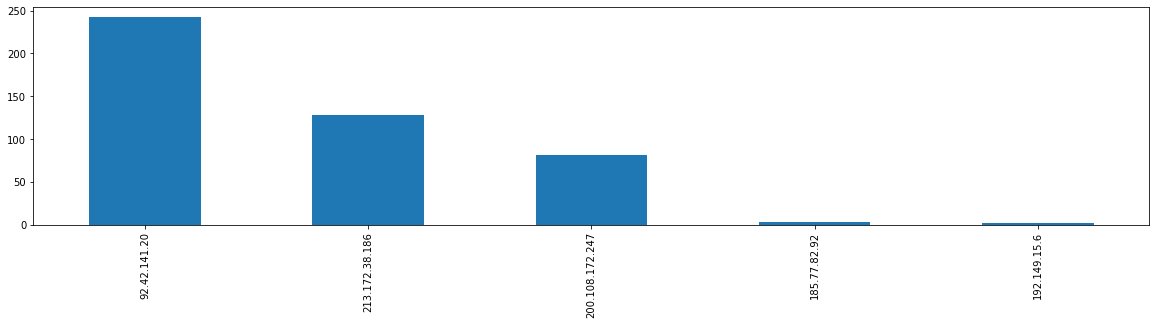

In [21]:
# Bar chart for c-ip vs count from data_login dataset
axx=data_login['c-ip'].value_counts()[:5].plot(kind='bar', figsize=(20,4))

# Create a new dataset where POST, Login, HTTP code 401 and c-ip common.

In [22]:
# split ip 92.42.141.20 data from the 401 sc-status login dataset
data_ip92 = data_login[data_login["c-ip"].str.contains("92.42.141.20")]

In [23]:
data_ip92

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
55058,2022-01-24,19:44:27,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,21
55059,2022-01-24,19:44:30,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,28
55064,2022-01-24,19:44:32,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,21
55065,2022-01-24,19:44:35,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,22
55066,2022-01-24,19:44:36,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55404,2022-01-24,19:52:17,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,29
55405,2022-01-24,19:52:20,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,26
55406,2022-01-24,19:52:21,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,29
55407,2022-01-24,19:52:22,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,23


In [24]:
# Split date, time, c-ip and cs(Refere) to investigate in depth. 
data_ip92.value_counts(subset=['date', 'time', 'c-ip', 'cs(Referer)'])

date        time      c-ip          cs(Referer)                        
2022-01-24  19:44:27  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:50:24  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:37  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:40  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:41  92.42.141.20  https://bankofpunk.local/login.aspx    1
                                                                          ..
            19:47:18  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:47:19  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:47:20  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:47:22  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:52:25  92.42.141.20  https://bankofpunk.local/login.aspx    1
Length: 242, dtype: int64

# References

1.	Fielding, R.T. and Reschke, J.F. (2014) Hypertext Transfer Protocol (HTTP/1.1): Authentication [online]. Available from: https://httpwg.org/specs/rfc7235.html#status.401 [Accessed 15 May 2022].
2.	Gatlan, S. (2019) Microsoft Warns of Phishing Attacks Using Custom 404 Pages Copyright @ 2003 - 2022 Bleeping Computer® LLC.August 16, 2019 [online]. Available from: https://www.bleepingcomputer.com/news/security/microsoft-warns-of-phishing-attacks-using-custom-404-pages/ [Accessed 15 May 2022].
3.	Mozilla (2022) 404 Not Found ©1998–2022 by individual mozilla.org contributors.2022 [online]. Available from: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/404 [Accessed 15 May 2022].
4.	Watson, M. (2017) How to Read & Customize IIS Log Files © 2022 Stackify.May 14, 2017 [online]. Available from: https://stackify.com/how-to-interpret-iis-logs/ [Accessed 15 May 2022].
5.	Wikipedia (2022) Brute-force attack Wikipedia.May 7, 2022 [online]. Available from: https://en.wikipedia.org/wiki/Brute-force_attack [Accessed 15 May 2022].
 
